In [2]:
import numpy as np 
import urdf2casadi.urdfparser as u2c
from urdf2casadi.geometry import plucker
from urdf_parser_py.urdf import URDF, Pose
import PyKDL as kdl
import kdl_parser_py.urdf as kdlurdf
from timeit import Timer, timeit, repeat
import rbdl
import pybullet as pb


In [18]:
path_to_urdf = "/home/lillmaria/urdf2casadi/examples/timing/urdf4timing/" + "1" + "dof.urdf"

sim = pb.connect(pb.DIRECT)
pbmodel = pb.loadURDF("17dof.urdf")

rbdlmodel = rbdl.loadModel("32dof.urdf")

In [5]:
def median(lst):
    n = len(lst)
    if n < 1:
            return None
    if n % 2 == 1:
            return sorted(lst)[n//2]
    else:
            return sum(sorted(lst)[n//2-1:n//2+1])/2.0
        
def average(lst): 
    return sum(lst) / len(lst) 

def M_kdl_func():
    for j in range(njoints):
        q_kdl[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        #qdot_kdl[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    kdl.ChainDynParam(kdlmodel, g_kdl).JntToMass(q_kdl, M_kdl)


def M_u2c_func():   
    for j in range(njoints):
        q_none = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
        #qdot_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    M_u2c(q_none)
    
def M_pb_func():
    for j in range(njoints):
        q_none[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2
    #print q
    H = pb.calculateMassMatrix(pbmodel, q_none)
    
def M_rbdl_func():
    for j in range(njoints):
        q_np[j] = (qmax[j] - qmin[j])*np.random.rand()-(qmax[j] - qmin[j])/2

    rbdl.CompositeRigidBodyAlgorithm(rbdlmodel, q_np, M_rbdl)



In [6]:
#pbmodel = pb.loadURDF("pantilt.urdf")
sim = pb.connect(pb.DIRECT)
#pbmodel = pb.loadURDF("/urdf4timing/1dof.urdf")
ndofs = 32
urdf_nr = list(range(ndofs + 1))
urdf_nr.pop(0)

#storage for timing data
mediantime_kdl = [None]*ndofs
mediantime_u2c = [None]*ndofs
mediantime_rbdl = [None]*ndofs
mediantime_pb = [None]*ndofs
mintime_kdl = [None]*ndofs
mintime_u2c = [None]*ndofs
mintime_rbdl = [None]*ndofs
mintime_pb = [None]*ndofs
averagetime_kdl = [None]*ndofs
averagetime_u2c = [None]*ndofs
averagetime_rbdl = [None]*ndofs
averagetime_pb = [None]*ndofs

nitr = 50000
nrepeat = 10
    
for i in range(ndofs):    
    print i
    #path_to_urdf = "/home/lillmaria/urdf2casadi/examples/timing/urdf4timing/" + str(urdf_nr[i]) + "dof.urdf"
    path_to_urdf = str(urdf_nr[i]) + "dof.urdf"
    end_link = "link" + str(urdf_nr[i])
    root = 'base_link'
    tip = end_link
    
    ok, kdl_tree = kdlurdf.treeFromFile(path_to_urdf)
    kdlmodel = kdl_tree.getChain(root,tip)
    
    rbdlmodel = rbdl.loadModel(path_to_urdf)
    pbmodel = pb.loadURDF("/urdf4timing/1dof.urdf")
    asd = u2c.URDFparser()
    robot_desc = asd.from_file(path_to_urdf)
    
    jlist, names, qmax, qmin = asd.get_joint_info(root, tip)
    njoints = len(jlist)

    g_kdl = kdl.Vector()
    M_kdl = kdl.JntSpaceInertiaMatrix(njoints)
    M_rbdl = (rbdlmodel.q_size, rbdlmodel.q_size)
    M_rbdl = np.zeros(M_rbdl)
    
    q_kdl = kdl.JntArray(njoints)
    q_np = np.zeros(njoints)
    q_none = [None]*njoints

    
    M_u2c = asd.get_jointspace_inertia_matrix(root, tip)
    timeit_u2c = repeat("M_u2c_func()", setup = "from __main__ import M_u2c_func", repeat = nrepeat, number = nitr)
    mintime_u2c[i] = min(timeit_u2c)
    mediantime_u2c[i] = median(timeit_u2c)
    averagetime_u2c[i] = average(timeit_u2c)
    
    timeit_pb = repeat("M_pb_func()", setup = "from __main__ import M_pb_func", repeat = nrepeat, number = nitr)
    mintime_pb[i] = min(timeit_pb)
    mediantime_pb[i] = median(timeit_pb)
    averagetime_pb[i] = average(timeit_pb)
    
    timeit_rbdl = repeat("M_rbdl_func()", setup = "from __main__ import M_rbdl_func", repeat = nrepeat, number = nitr)
    mintime_rbdl[i] = min(timeit_rbdl)
    mediantime_rbdl[i] = median(timeit_rbdl)
    averagetime_rbdl[i] = average(timeit_rbdl)

    timeit_kdl = repeat("M_kdl_func()", setup = "from __main__ import M_kdl_func", repeat = nrepeat, number = nitr)
    mintime_kdl[i] = min(timeit_kdl)
    mediantime_kdl[i] = median(timeit_kdl)
    averagetime_kdl[i] = average(timeit_kdl)


0
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
1dof.urdf
1
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
2dof.urdf
2
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
3dof.urdf
3
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
4dof.urdf
4
The root link base_link has an inertia specified in the URDF, but KDL does not support a root link with an inertia.  As a workaround, you can add an extra dummy link to your URDF.
5dof.urdf
5
The root link base_link has an inertia

In [27]:
print mintime_u2c

print mintime_u2c

[0.24313116073608398, 0.2986018657684326, 0.3251378536224365, 0.36098313331604004, 0.39151692390441895, 0.41787099838256836, 0.46309590339660645, 0.4831728935241699, 0.5293340682983398, 0.5636529922485352, 0.6057579517364502, 0.6465740203857422, 0.6871299743652344, 0.729403018951416, 0.7553520202636719, 0.7957751750946045, 0.8617382049560547, 0.903864860534668, 0.9244961738586426, 0.9729299545288086, 1.0396509170532227, 1.0621440410614014, 1.1567249298095703, 1.188889980316162, 1.2331080436706543, 1.3859100341796875, 1.3899741172790527, 1.4655280113220215, 1.5023469924926758, 1.5641391277313232, 1.59676194190979]
[0.24313116073608398, 0.2986018657684326, 0.3251378536224365, 0.36098313331604004, 0.39151692390441895, 0.41787099838256836, 0.46309590339660645, 0.4831728935241699, 0.5293340682983398, 0.5636529922485352, 0.6057579517364502, 0.6465740203857422, 0.6871299743652344, 0.729403018951416, 0.7553520202636719, 0.7957751750946045, 0.8617382049560547, 0.903864860534668, 0.9244961738586

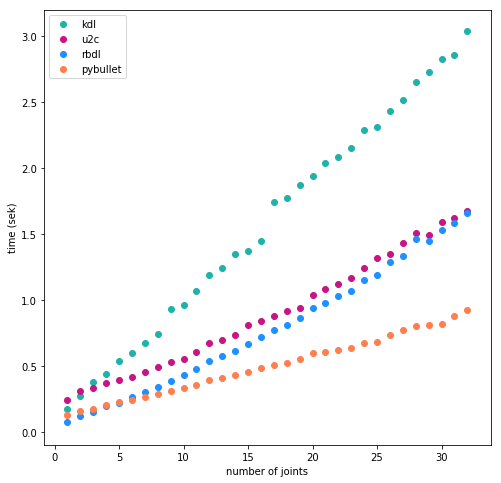

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

joint_nr = list(range(ndofs + 1))
joint_nr.pop(0)
med_fig = plt.figure(figsize = (8, 8))
plt.scatter(joint_nr, mediantime_kdl, c='lightseagreen', label='kdl')
#plt.scatter(joint_nr, mediantime_u2c, c='hotpink', label='u2c')
plt.scatter(joint_nr, mediantime_u2c, c='mediumvioletred', label='u2c')
plt.scatter(joint_nr, mediantime_rbdl, c='dodgerblue', label='rbdl')
plt.scatter(joint_nr, mediantime_pb, c='coral', label='pybullet')
plt.xlabel("number of joints")
plt.ylabel("time (sek)")
plt.legend(loc='upper left')
med_fig.show()


[Text(0,0,'RBDL'), Text(0,0,'U2C'), Text(0,0,'KDL'), Text(0,0,'pybullet')]

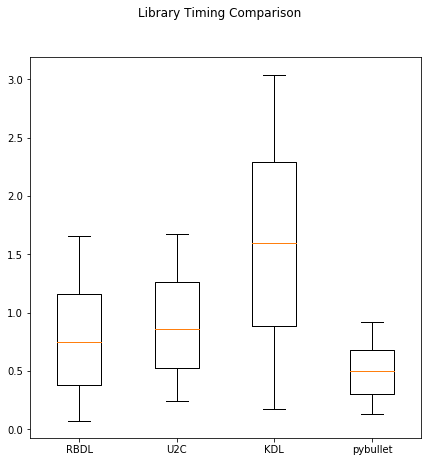

In [11]:
timing_scores = [mediantime_rbdl, mediantime_u2c, mediantime_kdl, mediantime_pb]
names = ["RBDL", "U2C", "KDL", "pybullet"]
boxplot = plt.figure(figsize = (7, 7))
boxplot.suptitle("Library Timing Comparison")
ax = boxplot.add_subplot(111)
ax.boxplot(timing_scores)
#plt.boxplot(timing_scores)
ax.set_xticklabels(names)


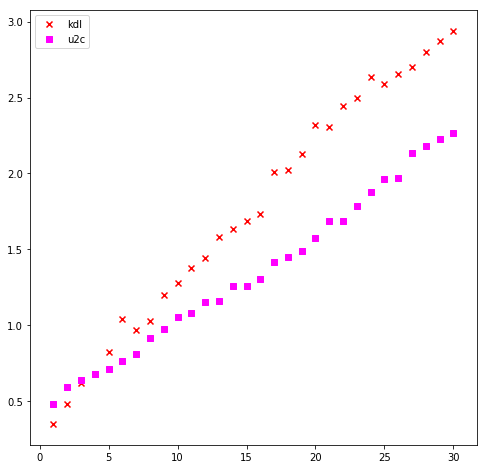

In [9]:
av_fig = plt.figure(figsize = (8, 8))
plt.scatter(joint_nr, averagetime_kdl, c='r', marker='x', label='kdl')
plt.scatter(joint_nr, averagetime_u2c, c='fuchsia', marker='s', label='u2c')
#plt.scatter(joint_nr, mediantime_rbdl, c='b', marker='s', label='rbdl')
#plt.scatter(joint_nr, mediantime_pb, c='r', marker='s', label='pybullet')
plt.legend(loc='upper left')
av_fig.show()


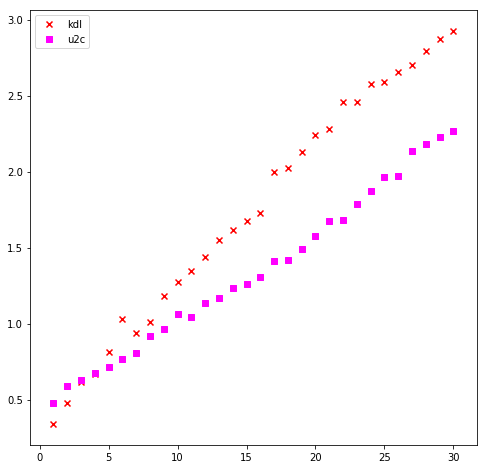

In [11]:
median_fig = plt.figure(figsize = (8, 8))
plt.scatter(joint_nr, mediantime_kdl, c='r', marker='x', label='kdl')
plt.scatter(joint_nr, mediantime_u2c, c='fuchsia', marker='s', label='u2c')
#plt.scatter(joint_nr, mediantime_rbdl, c='b', marker='s', label='rbdl')
#plt.scatter(joint_nr, mediantime_pb, c='r', marker='s', label='pybullet')
plt.legend(loc='upper left')
median_fig.show()

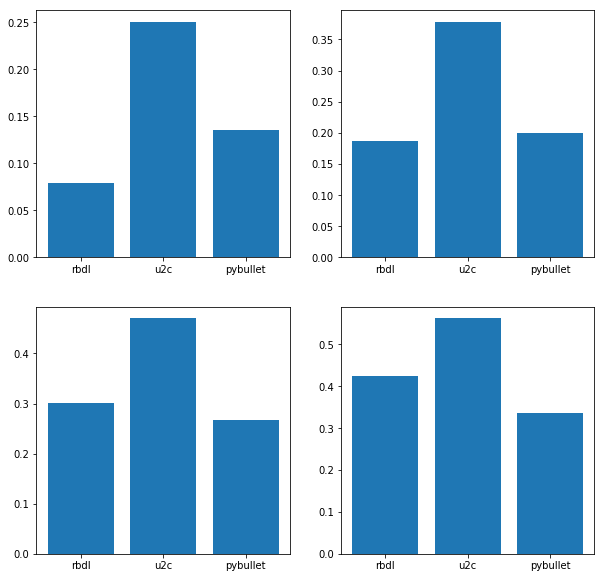

In [19]:
fig = plt.figure(figsize = (10, 10))
nplots = 5
x = np.arange(3)
j = 0
for i in range(1, nplots):
    plt.subplot(2, 2, i)
    plt.bar(x, height= [mintime_rbdl[j], mintime_u2c[j], mintime_pb[j]])
    plt.xticks(x, ['rbdl','u2c', 'pybullet'])
    j += 3

plt.show()

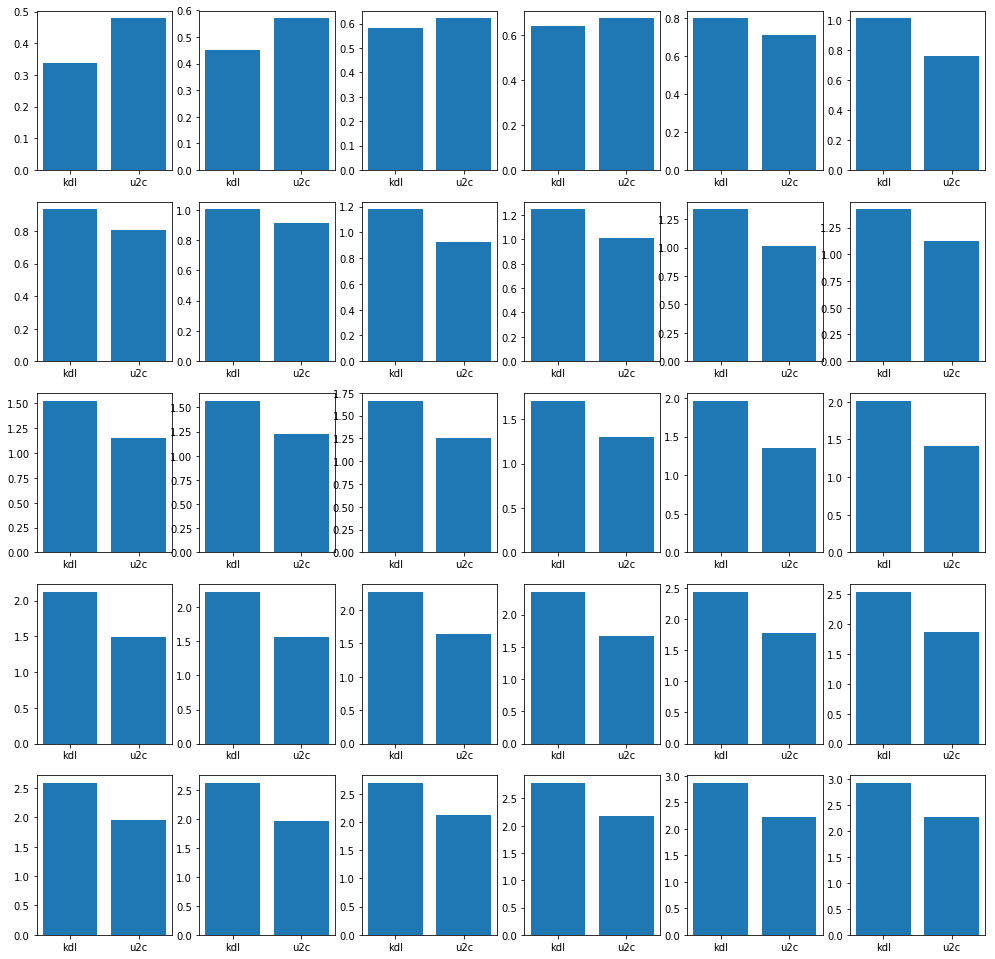

In [33]:
fig = plt.figure(figsize = (17, 17))
nplots = 31
j = 0
for i in range(1, nplots):
    plt.subplot(5, 6, i)
    plt.bar(x, height= [mintime_kdl[j], mintime_u2c[j]])
    plt.xticks(x, ['kdl','u2c'])
    j += 1

plt.show()